# Grupo 05 IA | Práctica 1

* Boris Carballa Corredoira
* Juan Carlos Villanueva Quirós
* Francisco Javier Blázquez Martínez

# Parte 1: Clustering

### 1) Conjunto de datos
+ **Nombre**: USArrests.csv

+ **Descripción**: Causas de arrestos en los diferentes estados de Estados Unidos en 1973. Contiene las cifras de arrestos por asalto, asesinato y violación por 100.000 residentes. Además, contiene la variable con el porcentaje de población que vive en áreas urbanas, la cual no usaremos para el clustering y que por lo tanto eliminaremos.

+ **Variables**: Nombre y tipo de cada variable.
   
+ **Estadísticos**: Tabla de estadísticos descriptivos para cada variable.

In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Leemos el archivo de datos proporcionado
df = pd.read_csv('USArrests.csv', index_col = 0)
#Quitamos la columna UrbanPop, pues no la usaremos para el clustering
df = df.drop(['UrbanPop'], axis=1)
#Mostramos el dataframe para ver que se importa correctamente
df

,Murder,Assault,Rape
Alabama,13.2,236,21.2
Alaska,10.0,263,44.5
Arizona,8.1,294,31.0
Arkansas,8.8,190,19.5
California,9.0,276,40.6
Colorado,7.9,204,38.7
Connecticut,3.3,110,11.1
Delaware,5.9,238,15.8
Florida,15.4,335,31.9
Georgia,17.4,211,25.8


In [45]:
#Mostramos el nombre y tipo de cada variable
df.dtypes

Murder     float64
Assault      int64
Rape       float64
dtype: object

In [46]:
#Mostramos los estadisticos
df.describe() 

,Murder,Assault,Rape
count,50.00000,50.000000,50.000000
mean,7.78800,170.760000,21.232000
std,4.35551,83.337661,9.366385
min,0.80000,45.000000,7.300000
25%,4.07500,109.000000,15.075000
50%,7.25000,159.000000,20.100000
75%,11.25000,249.000000,26.175000
max,17.40000,337.000000,46.000000


#### Conclusiones de los Datos
Tras el primer vistazo, lo primero que podemos apreciar es que las cifras de arresto por ***Assault* son mucho mayores** que por *Murder* y *Rape*.

Ahondando un poco más, si nos fijamos en la tabla de los estadísticos, podemos afirmar que la **desviación típica es muy alta en todas las variables**. Esto significa que los datos están muy *dispersos* con respecto a la media, lo que en primera instancia puede resultar beneficioso, pues nos aseguramos de *rellenar* el espacio.

De esta manera, si introducimos un nuevo caso en nuestra tabla, tendremos con cierta seguridad un caso similar y nuestro algoritmo será capaz de responder fiablemente.

Por último, si bien es verdad que parece poder haber cierta correlación, pues, en general, todas aumentan y disminuyen simultáneamente, **no podemos afirmar con firmeza la existencia de correlación entre variables**.

### 2) Re-escalado

Como ya hemos comentado, la variable **Assault** tiene valores mucho mayores con respecto a las demás variables y esto podría influir negativamente en el desempeño del algoritmo.

Para evitar esto, vamos a re-escalar dicha variable y para ello optamos por <u>estandarizarla</u>. Así, preservamos la proporción que hay entre los datos de la tabla.

In [47]:
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = StandardScaler()
X = scaler.fit_transform(df.values)
X

array([[ 1.25517927,  0.79078716, -0.00345116],
       [ 0.51301858,  1.11805959,  2.50942392],
       [ 0.07236067,  1.49381682,  1.05346626],
       [ 0.23470832,  0.23321191, -0.18679398],
       [ 0.28109336,  1.2756352 ,  2.08881393],
       [ 0.02597562,  0.40290872,  1.88390137],
       [-1.04088037, -0.73648418, -1.09272319],
       [-0.43787481,  0.81502956, -0.58583422],
       [ 1.76541475,  1.99078607,  1.1505301 ],
       [ 2.22926518,  0.48775713,  0.49265293],
       [-0.57702994, -1.51224105, -0.11129987],
       [-1.20322802, -0.61527217, -0.75839217],
       [ 0.60578867,  0.94836277,  0.29852525],
       [-0.13637203, -0.70012057, -0.0250209 ],
       [-1.29599811, -1.39102904, -1.07115345],
       [-0.41468229, -0.67587817, -0.34856705],
       [ 0.44344101, -0.74860538, -0.53190987],
       [ 1.76541475,  0.94836277,  0.10439756],
       [-1.31919063, -1.06375661, -1.44862395],
       [ 0.81452136,  1.56654403,  0.70835037],
       [-0.78576263, -0.26375734, -0.531

### 3) Algoritmos de Clustering

Con el fin de realizar agrupamientos de los estados que presenten un perfil de arrestos similar e identificar cuál es ese perfil de arrestos y qué estados pertenecen a él, vamos a aplicar a nuestro conjunto de datos, tanto un algoritmo de Clustering K-Means como un algoritmo Jerárquico Aglomerativo.

La siguiente función auxiliar dibuja los puntos en el plano.

In [57]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

#### 3.1) Clustering K-Means

El algoritmo k-means agrupa los datos en K grupos disjuntos, minimizando la suma de distancias dentro de cada cluster.

Cuando usamos k-means tenemos que especificar el número de clusters que queremos crear y a veces no sabemos cuántas agrupaciones deberíamos crear. 

Vamos a realizar varias agrupaciones con distintos valores de K y estudiar cómo de homogéneos son los clusters resultantes.

Generamos agrupaciones con valores de K entre 2 y 7. Para representar las agrupaciones, vamos a visualizarlas en diagramas de dispersión enfrentando las variables dos a dos.

K =  2
Murder | Assault


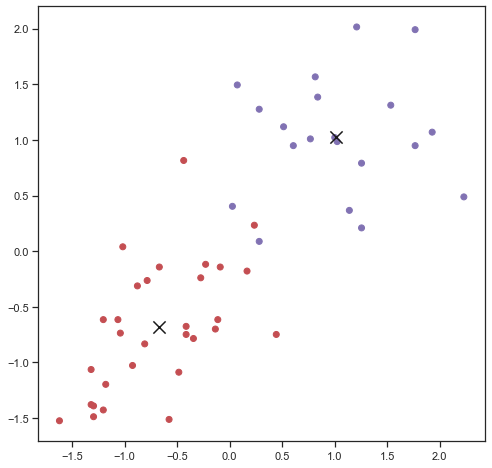

Murder | Rape


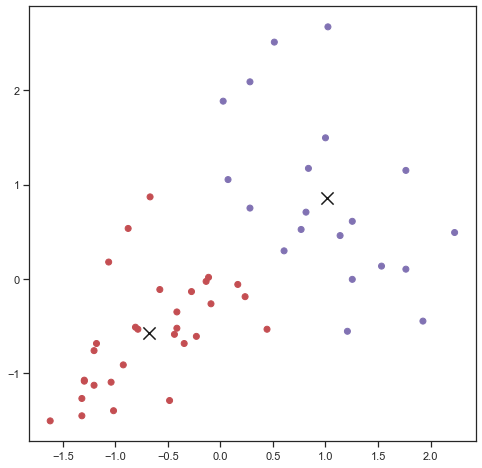

Assault | Rape


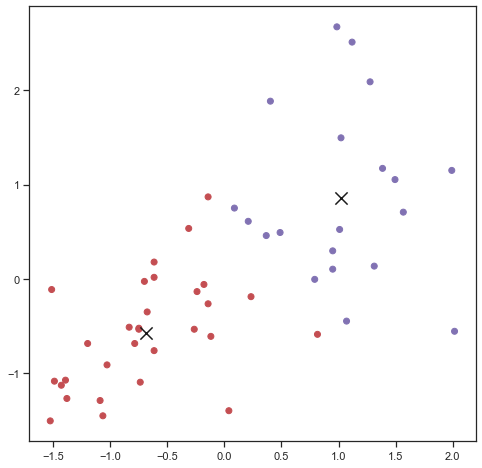

K =  3
Murder | Assault


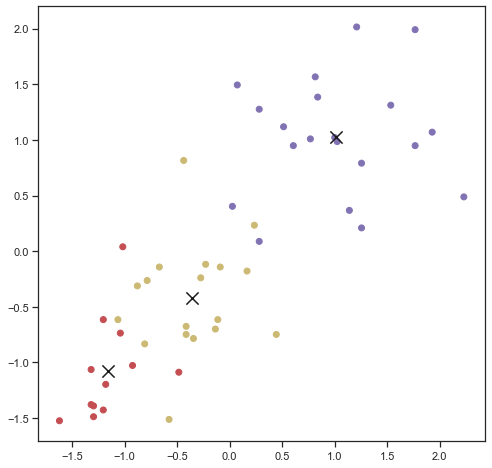

Murder | Rape


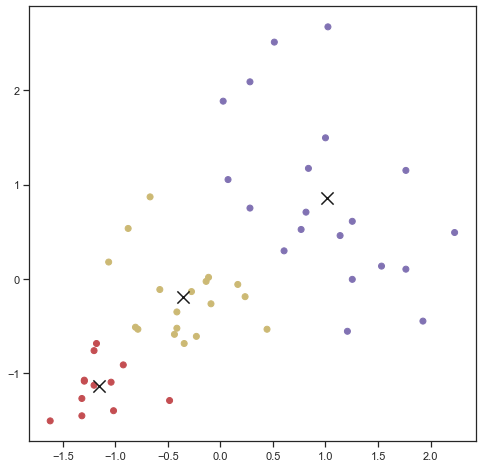

Assault | Rape


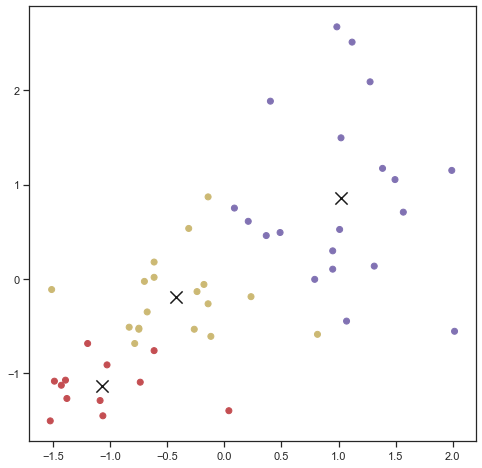

K =  4
Murder | Assault


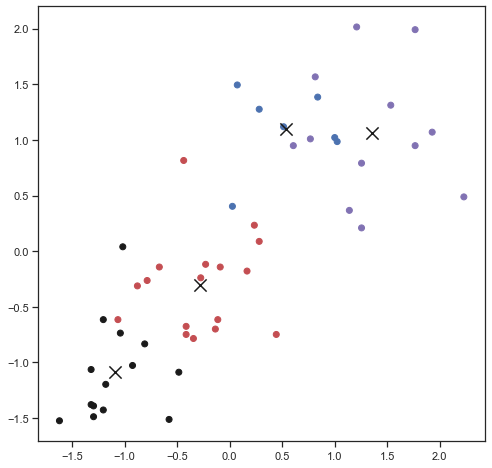

Murder | Rape


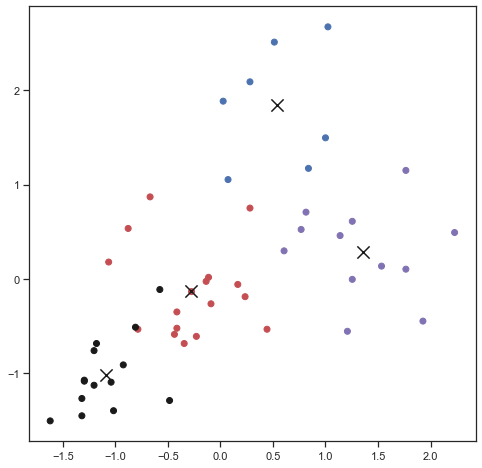

Assault | Rape


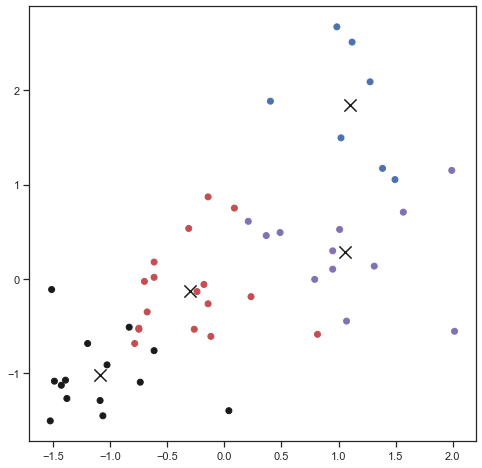

K =  5
Murder | Assault


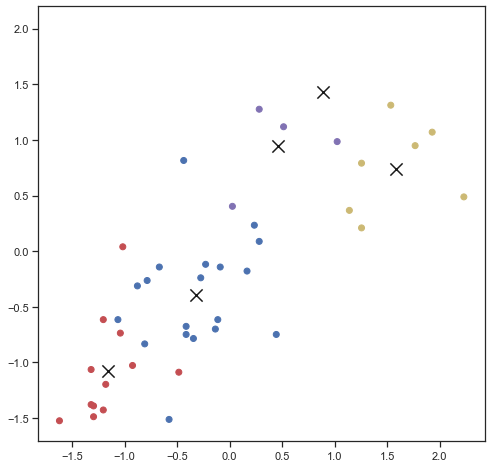

Murder | Rape


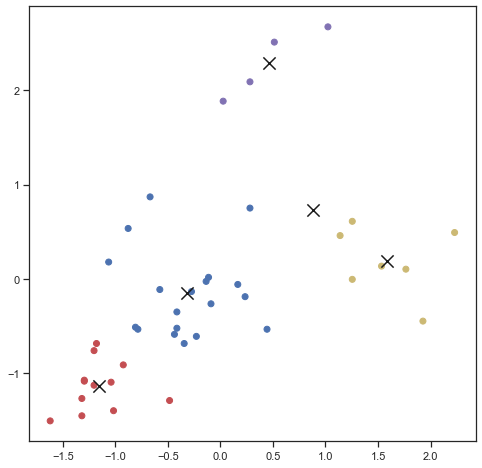

Assault | Rape


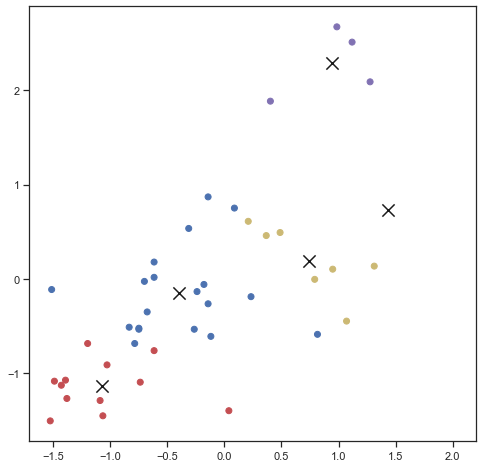

K =  6
Murder | Assault


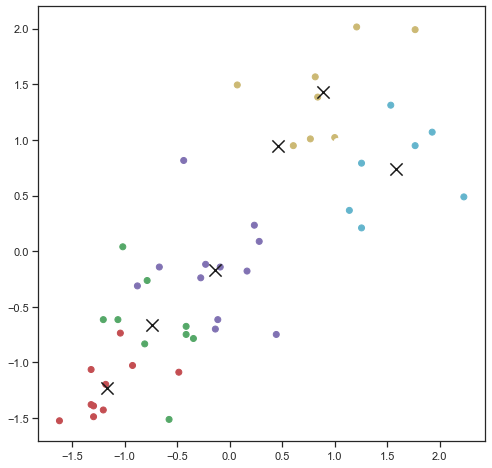

Murder | Rape


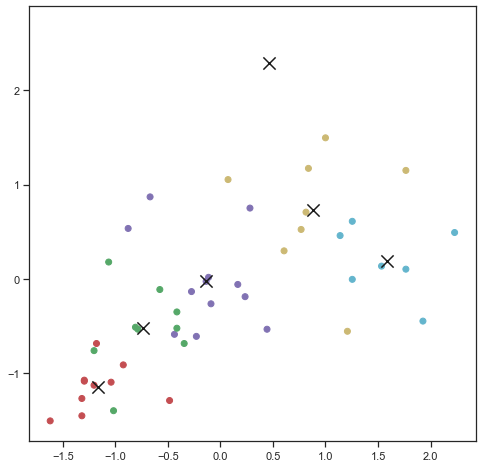

Assault | Rape


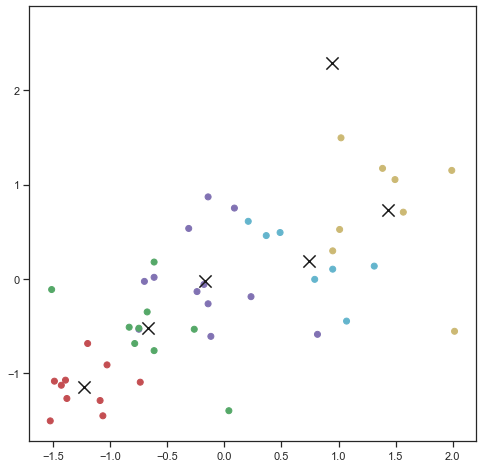

K =  7
Murder | Assault


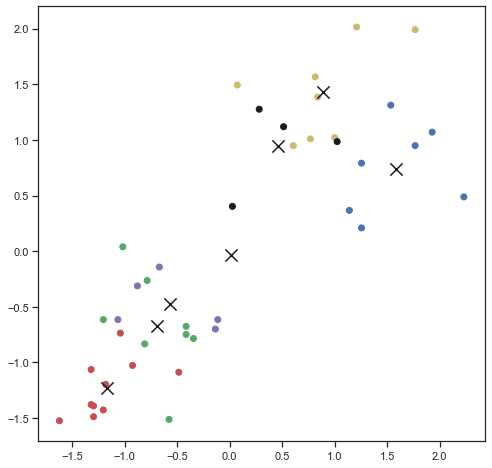

Murder | Rape


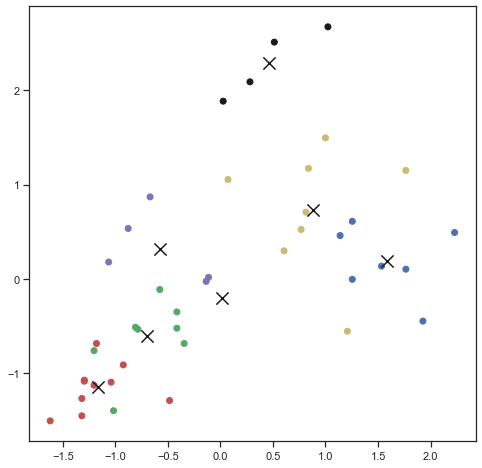

Assault | Rape


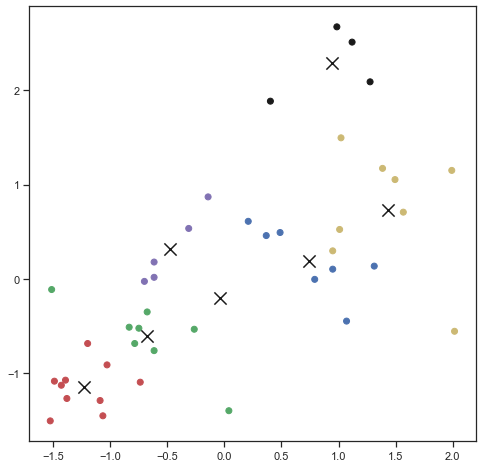

In [58]:
K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)

for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=333)
    km.fit(X)
    
    print("K = ", k)
    print("Murder | Assault")
    plot_clusters(X[:, [0,1]], km.labels_, km.cluster_centers_[:, [0,1]])
    
    print("Murder | Rape")
    plot_clusters(X[:, [0,2]], km.labels_, km.cluster_centers_[:, [0,2]])
    
    print("Assault | Rape")
    plot_clusters(X[:, [1,2]], km.labels_, km.cluster_centers_[:, [1,2]])
    
    davies_boulding[k-2] = davies_bouldin_score(X, km.labels_) 

A continuación, **pintamos el valor del índice de *Davies–Bouldin* para los distintos valores de K**.

Como ya sabemos, en el aprendizaje no supervisado no hay realmente una solución correcta, pues el objetivo es descubrir estructura en los datos.
No obstante, este índice mide lo "*compacto*" de una representación y así, nos ayuda a elegir el número adecuado de *clusters*.

Recordemos que el valor del *índice de Davies-Bouldin* viene dado por el cociente entre la dispersión de los clusters y la separación de los mismos. De esta manera, cuanto más pequeño el valor obtenido para una partición, más compactos y separados estarán los clusters.

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

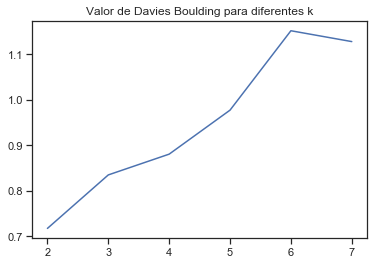

In [59]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

#### Conclusion K-Means
Podemos observar que el mejor valor (el más pequeño) se obtiene para **k = 2**, luego será este el número de *clusters* que elegiremos para nuestro algoritmo K-Means.

#### 3.2) Clustering Agrupamiento Jerárquico

Los Algoritmos de Agrupamiento Jerárquico construyen clusters anidados uniendo o separando otros clusters. La jerarquía de clusters se puede representar en forma de árbol o dendrograma. Los algoritmos aglomerativos construyen los clusters de abajo hacia arriba: inicialmente cada punto es un cluster y se van uniendo para crear clusters más grandes.

Vamos a repetir el mismo proceso pero con el Algoritmo de Agrupamiento Jerárquico.

K =  2
Murder | Assault


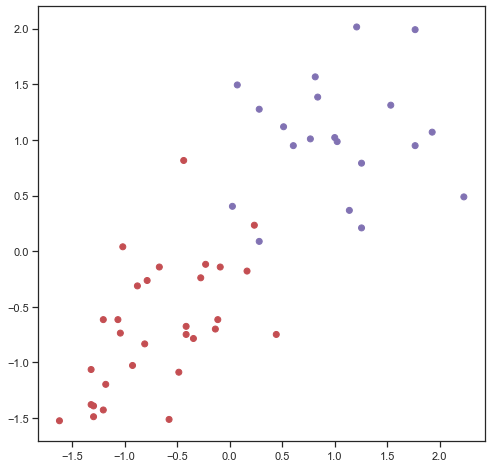

Murder | Rape


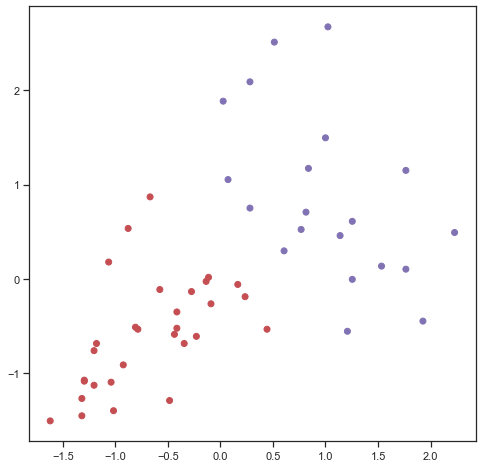

Assault | Rape


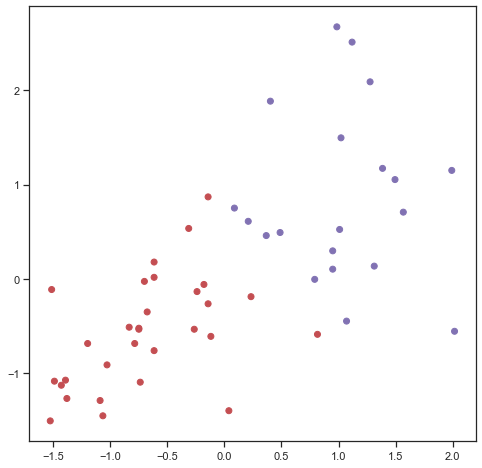

K =  3
Murder | Assault


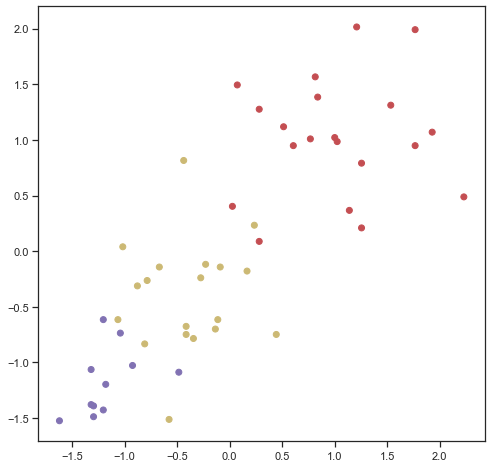

Murder | Rape


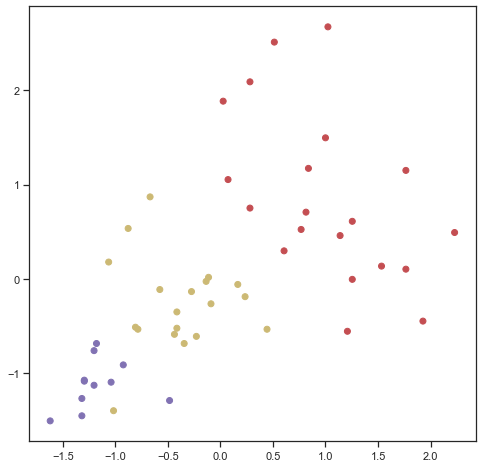

Assault | Rape


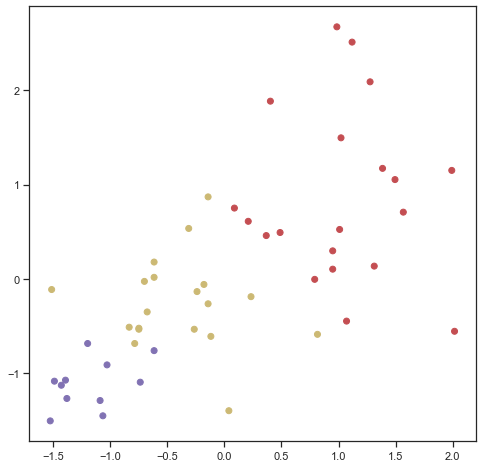

K =  4
Murder | Assault


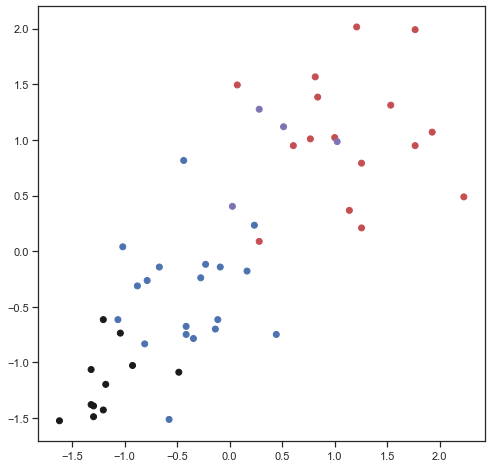

Murder | Rape


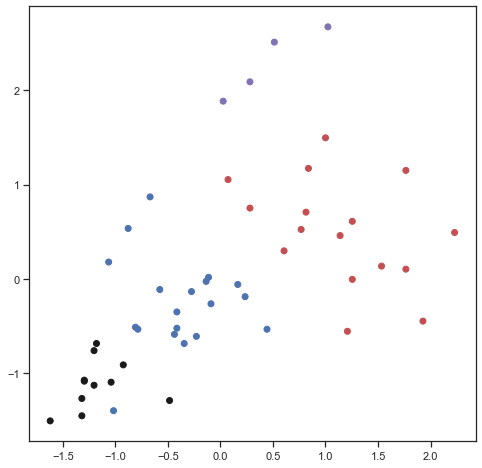

Assault | Rape


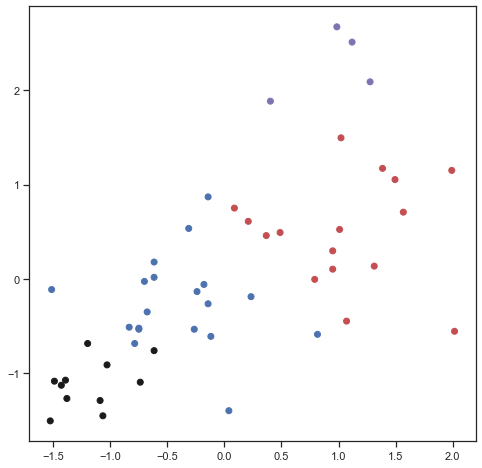

K =  5
Murder | Assault


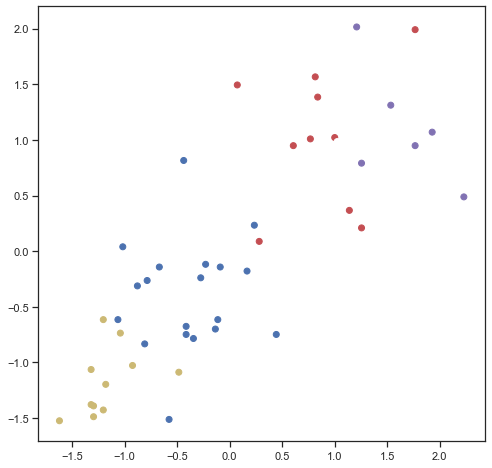

Murder | Rape


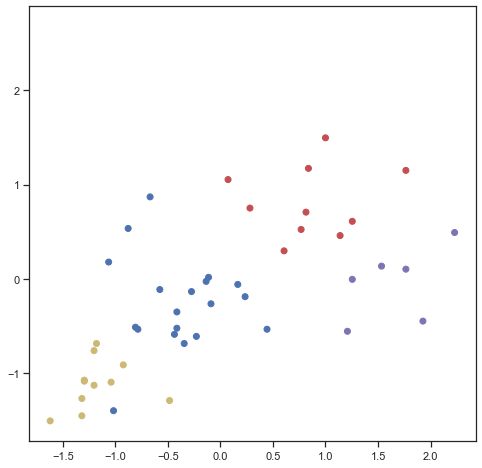

Assault | Rape


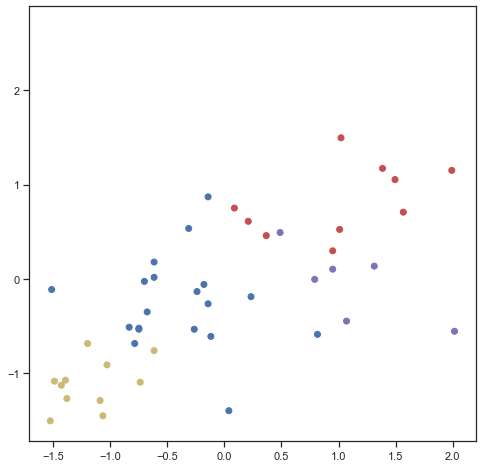

K =  6
Murder | Assault


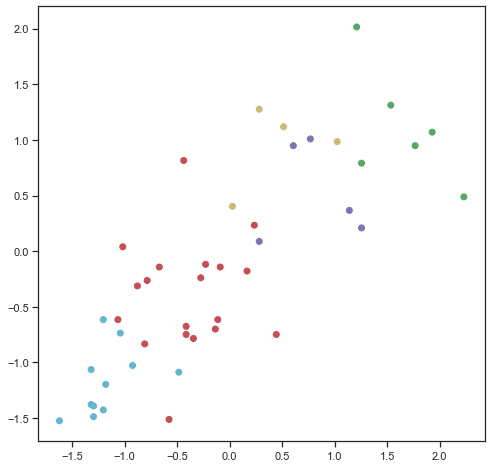

Murder | Rape


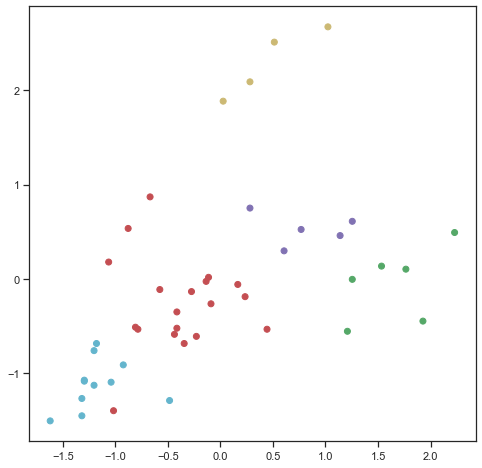

Assault | Rape


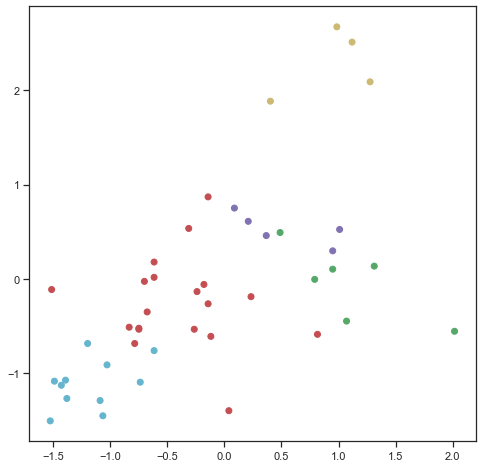

K =  7
Murder | Assault


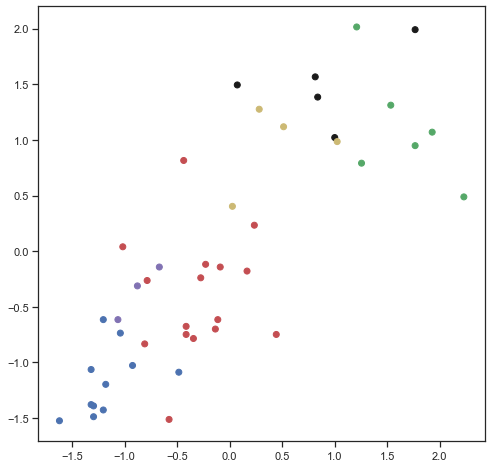

Murder | Rape


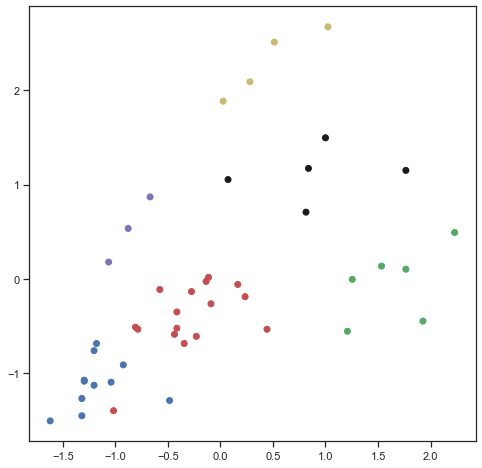

Assault | Rape


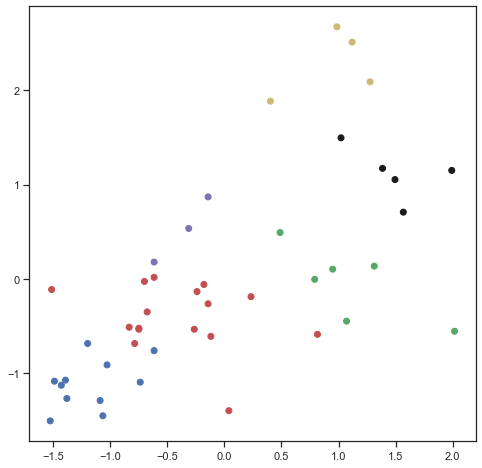

In [60]:
K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    ag.fit(X)    
    
    print("K = ", k)
    print("Murder | Assault")
    plot_clusters(X[:,[0,1]], ag.labels_)

    print("Murder | Rape")
    plot_clusters(X[:, [0,2]], ag.labels_)

    print("Assault | Rape")
    plot_clusters(X[:, [1,2]], ag.labels_)
    
    
    davies_boulding[k-2] = davies_bouldin_score(X, ag.labels_) 

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

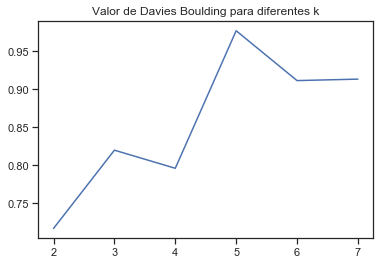

In [61]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

Finalmente, vamos a dibujar el *dendrograma de la jerarquía de clusters.* Como el número de datos no es excesivamente grande, podemos representar el diagrama en su totalidad.

El resultado es una jerarquía en la que podemos ver la estructura de agrupación que ha ido siguiendo el algoritmo.

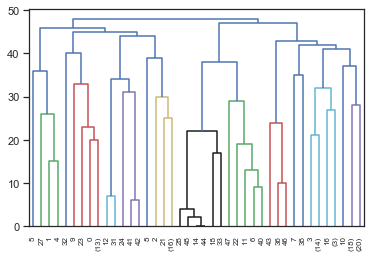

In [62]:
# Sciki-learn no pinta el dendrograma, pero scipy sí, 
# la siguiente función permite usar el modelo ajustado por scikit learn para pintar el dendrograma
# https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    


ag = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
ag.fit(X)

# Dibujar todos los niveles del arbol (6)
levels = 6
plot_dendrogram(ag, p=levels, truncate_mode='level')

# Árbol completo
#plot_dendrogram(ag)

#### Conclusion Agrupamiento Jerárquico
Podemos observar que el mejor valor (el más pequeño) se obtiene para **k = 2**, luego será este el número de *clusters* que elegiremos para nuestro Algoritmo de Agrupamiento Jerárquico.

Aunque a priori ambos algoritmos no tienen por qué devolver el mismo resultado, nótese que para ambos el valor óptimo de clusters es el mismo.

### 4) Sentido de los Clusters Resultantes
Para analizar y dar sentido a los Clusters que hemos obtenido, vamos que describir sus estadísticos descriptivos y a obtener una matriz de gráficos de dispersión.

#### 4.1) Estadísticos Descriptivos

Vamos a segmentar los individuos de nuestro conjunto de datos según al *cluster* al que pertenezcan y utilizar estadísticos descriptivos para ver la distribución de las variables (centralidad, dispersión, rangos, etc).

A nuestro dataframe original le añadiremos la columna de los clusters.

In [63]:
#Ejecutamos el algoritmo clustering con K=2.
#Este es el número de clusters finalmente elegido
km = KMeans(init='random', n_clusters=2, random_state=333)
km.fit(X)

#Le añadimos al dataFrame la columna Cluster
df['Cluster'] = km.labels_
df

,Murder,Assault,Rape,Cluster
Alabama,13.2,236,21.2,1
Alaska,10.0,263,44.5,1
Arizona,8.1,294,31.0,1
Arkansas,8.8,190,19.5,0
California,9.0,276,40.6,1
Colorado,7.9,204,38.7,1
Connecticut,3.3,110,11.1,0
Delaware,5.9,238,15.8,0
Florida,15.4,335,31.9,1
Georgia,17.4,211,25.8,1


Mostramos la tabla de estadísticos descriptivos:

In [64]:
df.groupby(["Cluster"]).describe()

Murder                                                     Assault  \
         count    mean       std  min     25%    50%     75%   max   count   
Cluster                                                                      
0         30.0   4.870  2.304291  0.8   2.825   4.65   6.525   9.7    30.0   
1         20.0  12.165  2.684904  7.9  10.300  12.15  13.500  17.4    20.0   

                     ...                Rape                             \
               mean  ...    75%    max count       mean       std   min   
Cluster              ...                                                  
0        114.433333  ...  150.5  238.0  30.0  15.943333  5.460370   7.3   
1        255.250000  ...  280.5  337.0  20.0  29.165000  8.386473  16.1   

                                      
            25%    50%     75%   max  
Cluster                               
0        11.225  16.05  19.875  29.3  
1        23.625  27.35  32.850  46.0  

[2 rows x 24 columns]

#### 4.2) Matriz de Gráficos de Dispersión

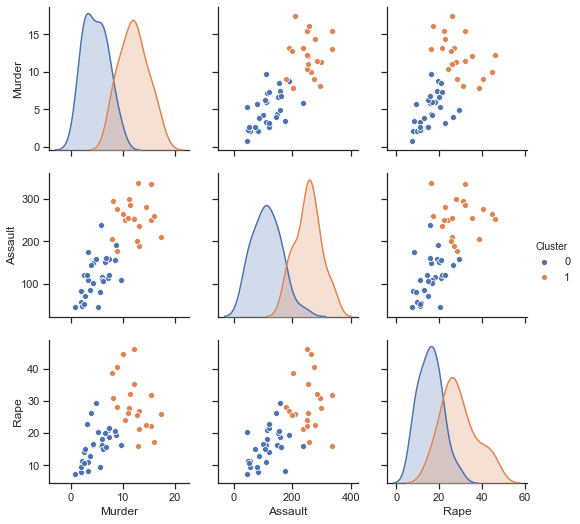

In [65]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="Cluster", vars = ["Murder", "Assault", "Rape"])

#### 4.3) Conclusiones finales
Como podemos observar a partir de las medias de cada cluster en la tabla de estadísticos descriptivos, realmente **el algoritmo ha separado entre estados con alto y bajo índice de criminalidad, independientemente del crimen cometido.**

Además, vemos como ambos clusters tienen un número parecido de elementos (20 y 30) y su desviación también es similar. Luego la estructura de ambos clusters es parecida.

En la matriz de gráficos de dispersión se muestra claramente cómo los puntos pertenecientes al cluster 0 se encuentran en todos los casos cerca del origen (baja criminalidad) y los puntos pertenecientes al cluster 1 alejados del origen (alta criminalidad).

Con los gráficos de la diagonal podemos observar que, en líneas generales, los clusters se han separado correctamente pues la intersección, sobre todo en *Murder* y *Assault* es bastante escasa. No obstante, la variable *Rape* tiene un mayor intervalo de intersección. De esta manera, si hiciéramos el clustering basándonos únicamente en esta variable, podrían dar lugar a *clusters* más confusos.